In [1]:
# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import dependencies
import numpy as np
import pandas as pd

# Computations
import itertools

# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Visualization
import matplotlib.pyplot as plt

Data Loading

In [2]:
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv ("data/test.csv")

In [3]:
data_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
print(f"The Train Shape : {data_train.shape}")
print(f"The Test Shape : {data_test.shape}")

The Train Shape : (20800, 5)
The Test Shape : (5200, 4)


INFO

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
data_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
data_train.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [8]:
train = data_train.fillna(' ')
test = data_test.fillna(' ')

In [9]:
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   total   20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [11]:
train.head(10)

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [12]:
X_train, X_test, y_train, y_test = train_test_split(train['total'], train.label, test_size = 0.3, random_state = 0)

Vectorizing Data

In [13]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)

MODELS

In [15]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.9389423076923077


In [16]:
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.91234
Alpha: 0.05 Score: 0.93830
Alpha: 0.10 Score: 0.93894
Alpha: 0.15 Score: 0.93894
Alpha: 0.20 Score: 0.93750
Alpha: 0.25 Score: 0.93782
Alpha: 0.30 Score: 0.93734
Alpha: 0.35 Score: 0.93654
Alpha: 0.40 Score: 0.93526
Alpha: 0.45 Score: 0.93413
Alpha: 0.50 Score: 0.93269
Alpha: 0.55 Score: 0.93141
Alpha: 0.60 Score: 0.93093
Alpha: 0.65 Score: 0.93045
Alpha: 0.70 Score: 0.92949
Alpha: 0.75 Score: 0.92869
Alpha: 0.80 Score: 0.92804
Alpha: 0.85 Score: 0.92772
Alpha: 0.90 Score: 0.92628
Alpha: 0.95 Score: 0.92500


The best score = 0.94279, when Alpha = 0.15

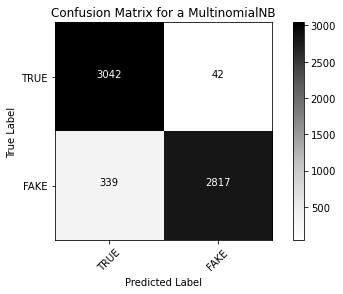

In [17]:
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels = [0,1])

# Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Greys):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion Matrix for a MultinomialNB')

~

In [18]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.9278846153846154


In [19]:
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

Alpha: 0.00  Score: 0.90881
Alpha: 0.01  Score: 0.94407
Alpha: 0.02  Score: 0.94343
Alpha: 0.03  Score: 0.94247
Alpha: 0.04  Score: 0.94038
Alpha: 0.05  Score: 0.93766
Alpha: 0.06  Score: 0.93654
Alpha: 0.07  Score: 0.93381
Alpha: 0.08  Score: 0.93061
Alpha: 0.09  Score: 0.92981


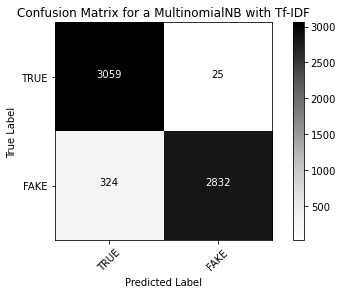

In [20]:
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels = [0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion Matrix for a MultinomialNB with Tf-IDF')

0.967948717948718


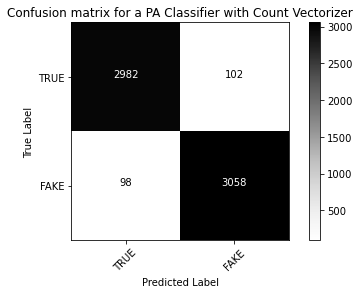

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter = 10)
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels = [0,1])
plot_confusion_matrix(cm6, classes = ['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

0.979326923076923


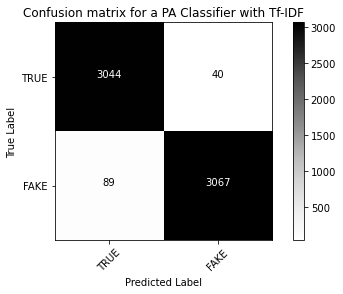

In [22]:
linear_classifier = PassiveAggressiveClassifier(max_iter = 10)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)
cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels = [0,1])
plot_confusion_matrix(cm5, classes = ['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

0.9786858974358974


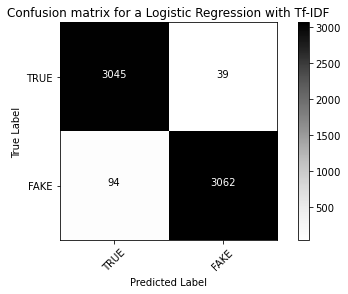

In [23]:
logreg = LogisticRegression(C = 1e5)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels = [0,1])
plot_confusion_matrix(cm4, classes = ['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

0.9772435897435897


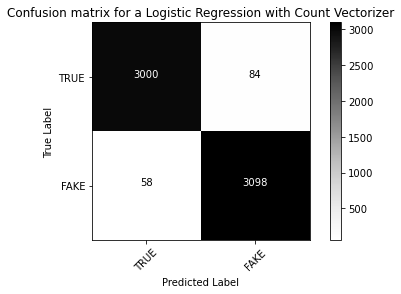

In [24]:
logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)
cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels = [0,1])
plot_confusion_matrix(cm3, classes = ['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

What else ?